<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/RAG_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

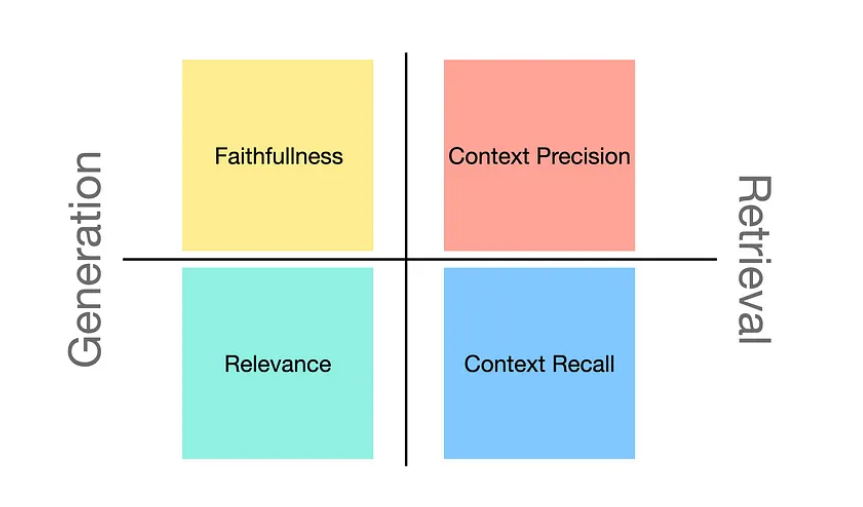

## RAG
**Retrieval Augmented Generation (RAG)** is a very popular framework or class of LLM Application.

* The basic principle of RAG is to leverage external data sources to give LLMs contextual reference.

* Any RAG implementation has two aspects:
    - Generation : Generation is performed by the LLM, which generates the answer by using the retrieved information.
    - Retrieval : Retriever retrieves the relevant information.

## Evaluating RAG

When evaluating a RAG pipeline, both of generator and retriever need to be evaluated separately and together to get an overall score as well as the individual scores to pinpoint the aspects to improve.


## Why Evaluate RAG Pipelines?
* If we want to optimise the pipeline we have to measure it objectively.
* In order to improve performance and decrease cost
* Ensuring Quality before moving to production

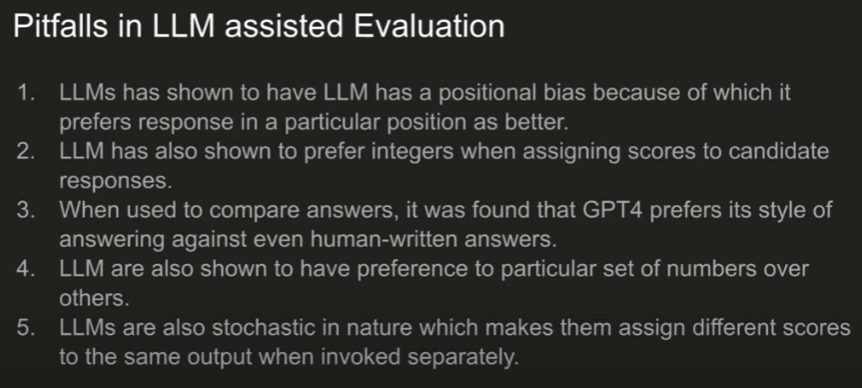

[ragas](https://github.com/explodinggradients/ragas/tree/main) is a framework that helps you evaluate your Retrieval Augmented Generation (RAG) pipelines. RAG denotes a class of LLM applications that use external data to augment the LLM’s context. There are existing tools and frameworks that help you build these pipelines but evaluating it and quantifying your pipeline performance can be hard... This is where ragas (RAG Assessment) comes in

ragas provides you with the tools based on the latest research for evaluating LLM-generated text to give you insights about your RAG pipeline. ragas can be integrated with your CI/CD to provide continuous checks to ensure performance.

## Ragas references the following data:

* **Question**: These are the questions your RAG pipeline will be evaluated on.

* **Answer**: The answer generated from the RAG pipeline and presented to the user.

* **Contexts**: The contexts passed into the LLM to answer the question.

* **Ground Truths**: The ground truth answer to the questions.

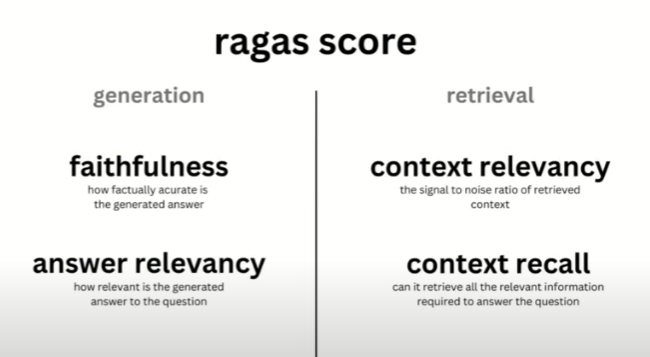

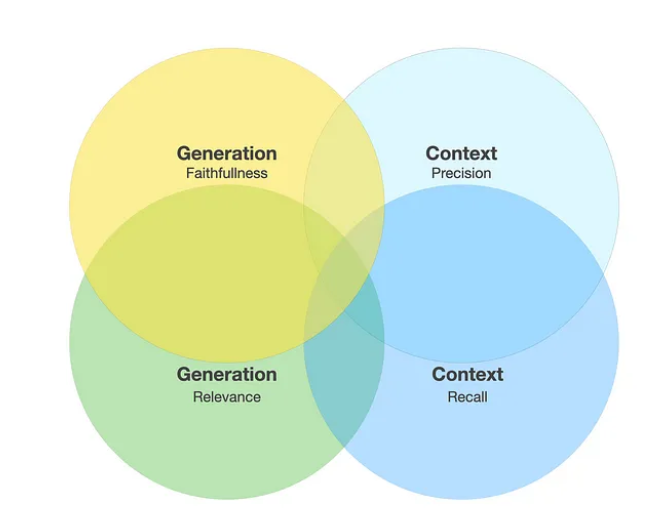

* The harmonic mean of these 4 aspects gives you the ragas score which is a single measure of the performance of your QA system across all the important aspects.

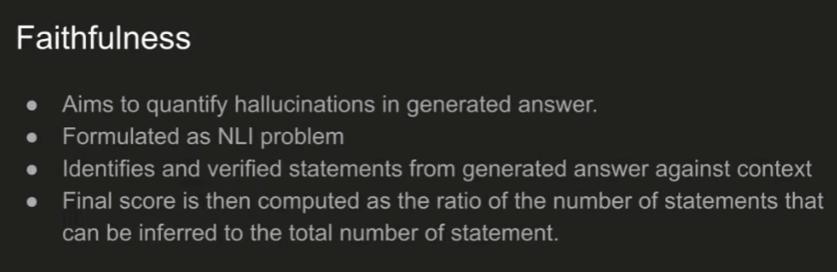

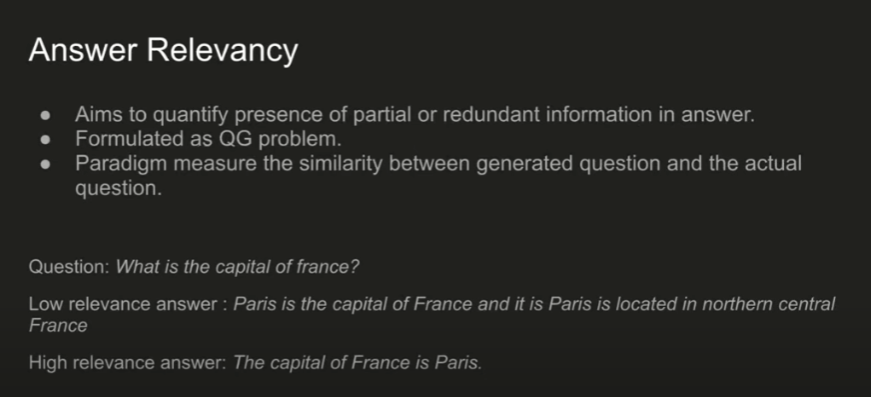

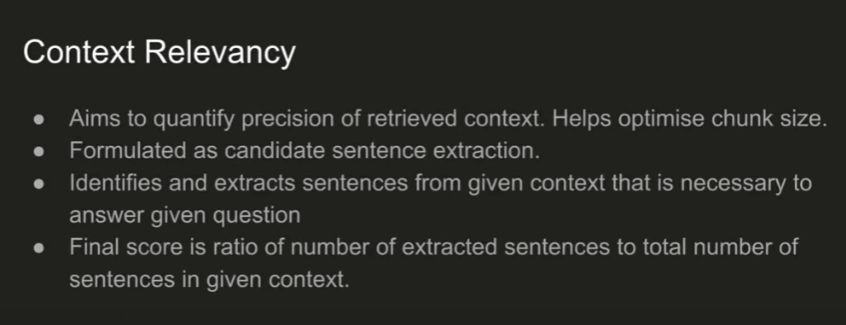

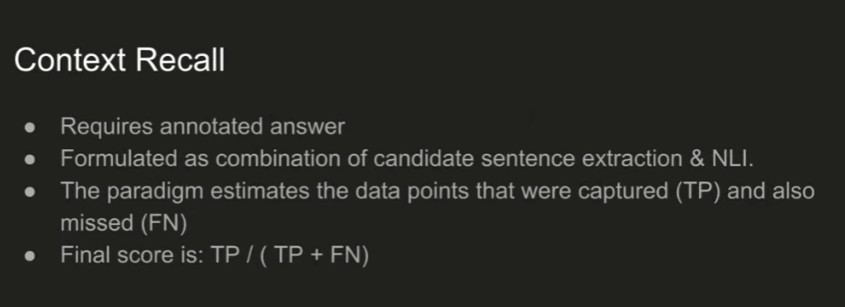

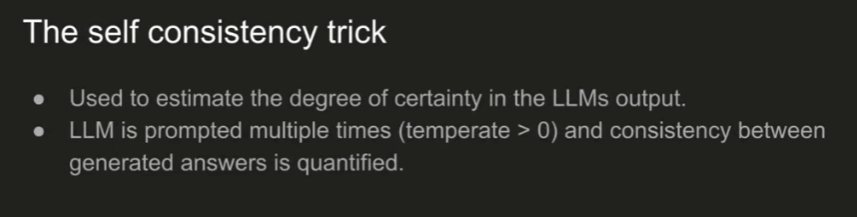

#### The following output is produced by Ragas:
1. **Retrieval**: ```context_relevancy ```and ```context_recall``` which represents the measure of the performance of your retrieval system.
2. **Generation**: ```faithfulness``` which measures hallucinations and ```answer_relevancy``` which measures the answers to question relevance.

## Implementing Ragas Evaluation to a medical question answering system

#### 1. Download dataset

In [1]:
import pandas as pd
import numpy as np
#
url = "https://raw.githubusercontent.com/priya-mane/diseases-data-scraper/master/disease_components.csv"
df = pd.read_csv(url,encoding='utf-8',encoding_errors='ignore')
df.head()

,name,link,Symptoms,Overview,Causes,Risk factors,diagnosis
0,Acanthosis nigricans,https://www.mayoclinic.org/diseases-conditions...,"[""Skin changes are the only signs of acanthosi...","['', 'Acanthosis nigricans is a skin condition...",['Acanthosis nigricans has been associated wit...,"['Acanthosis nigricans risk factors include:',...",['Acanthosis nigricans is typically detected d...
1,Achalasia,https://www.mayoclinic.org/diseases-conditions...,['Achalasia symptoms generally appear graduall...,['Achalasia is a rare disorder that makes it d...,['The exact cause of achalasia is poorly under...,NaN,['Achalasia can be overlooked or misdiagnosed ...
2,Achilles tendon rupture,https://www.mayoclinic.org/diseases-conditions...,"[""Although it's possible to have no signs or s...","['', 'The Achilles tendon is a strong fibrous ...",['Your Achilles tendon helps you point your fo...,['Factors that may increase your risk of Achil...,"['During the physical exam, your doctor will i..."
3,Acute coronary syndrome,https://www.mayoclinic.org/diseases-conditions...,['The signs and symptoms of acute coronary syn...,['Acute coronary syndrome is a term used to de...,['Acute coronary syndrome usually results from...,['The risk factors for acute coronary syndrome...,['If you have signs or symptoms associated wit...
4,Adenomyosis,https://www.mayoclinic.org/diseases-conditions...,"['Sometimes, adenomyosis causes no signs or sy...","['', 'With adenomyosis, the same tissue that l...","[""The cause of adenomyosis isn't known. There ...","['Risk factors for adenomyosis include:', 'Mos...",['Some other uterine conditions can cause sign...


In [11]:
df.shape

(1183, 7)

In [9]:
df.isnull().sum()[df.isnull().sum() > 0]

Symptoms         77
Overview         38
Causes           86
Risk factors    255
diagnosis        53
dtype: int64

In [10]:
df[df['Symptoms'].isna()]

,Disease,link,Symptoms,Overview,Causes,Risk factors,diagnosis
6,Adnexal tumors,https://www.mayoclinic.org/diseases-conditions...,NaN,The ovaries fallopian tubes uterus cervix and...,NaN,NaN,NaN
8,Adrenoleukodystrophy,https://www.mayoclinic.org/diseases-conditions...,NaN,Adrenoleukodystrophy (uh-dree-noh-loo-koh-DIS-...,NaN,NaN,To diagnose ALD your doctor will review your s...
24,Anal fistula,https://www.mayoclinic.org/diseases-conditions...,NaN,Anal fistula is the medical term for an infect...,NaN,NaN,NaN
28,Aneurysms,https://www.mayoclinic.org/diseases-conditions...,NaN,An aneurysm is an abnormal bulge or ballooning...,NaN,NaN,NaN
38,Aortic aneurysm,https://www.mayoclinic.org/diseases-conditions...,NaN,An aortic aneurysm occurs when a weak spot i...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1088,Ulnar wrist pain,https://www.mayoclinic.org/diseases-conditions...,NaN,Ulnar wrist pain is pain on the side of your w...,A common cause of ulnar wrist pain is a fall o...,NaN,To diagnose the underlying cause of ulnar wris...
1115,Vaginal fistula,https://www.mayoclinic.org/diseases-conditions...,NaN,A vaginal fistula is an abnormal opening that ...,NaN,NaN,NaN
1126,Vascular rings,https://www.mayoclinic.org/diseases-conditions...,NaN,NaN,NaN,NaN,Your childs doctor may initially suspect a pro...
1143,Voice disorders,https://www.mayoclinic.org/diseases-conditions...,NaN,People develop voice problems for many reasons...,Your voice box (larynx) is made of cartilage m...,Many risk factors can contribute to a voice di...,Your doctor will ask you detailed questions ab...


In [12]:
df = df[~(df['Symptoms'].isna())]
df.shape

(1106, 7)

In [13]:
df.isnull().sum()[df.isnull().sum() > 0]

Causes           15
Risk factors    180
diagnosis        22
dtype: int64

In [14]:
df['diagnosis'] = df['diagnosis'].fillna("Contact your medical practioner")

In [15]:
df['Causes'] = df['Causes'].fillna(' ')

#### 2. Preprocess Data

In [16]:
import re
to_replace=["\[","\]","\'","\"","\,"]
replace_with=['','','','','']

#print(df.text.replace(to_replace, replace_with, regex=True))
df['Symptoms'] = df['Symptoms'].replace(to_replace, replace_with, regex=True)
df['Causes'] = df['Causes'].replace(to_replace, replace_with, regex=True)
df['diagnosis'] = df['diagnosis'].replace(to_replace, replace_with, regex=True)
df['Overview'] = df['Overview'].replace(to_replace, replace_with, regex=True)
#
df.rename(columns={'name':'Disease'},inplace=True)
#
new = df[['Disease','Symptoms','Causes','diagnosis','Overview','link']].copy()
#
new.head()

,Disease,Symptoms,Causes,diagnosis,Overview,link
0,Acanthosis nigricans,Skin changes are the only signs of acanthosis ...,Acanthosis nigricans has been associated with:...,Acanthosis nigricans is typically detected dur...,Acanthosis nigricans is a skin condition that...,https://www.mayoclinic.org/diseases-conditions...
1,Achalasia,Achalasia symptoms generally appear gradually ...,The exact cause of achalasia is poorly underst...,Achalasia can be overlooked or misdiagnosed be...,Achalasia is a rare disorder that makes it dif...,https://www.mayoclinic.org/diseases-conditions...
2,Achilles tendon rupture,Although its possible to have no signs or symp...,Your Achilles tendon helps you point your foot...,During the physical exam your doctor will insp...,The Achilles tendon is a strong fibrous cord ...,https://www.mayoclinic.org/diseases-conditions...
3,Acute coronary syndrome,The signs and symptoms of acute coronary syndr...,Acute coronary syndrome usually results from t...,If you have signs or symptoms associated with ...,Acute coronary syndrome is a term used to desc...,https://www.mayoclinic.org/diseases-conditions...
4,Adenomyosis,Sometimes adenomyosis causes no signs or sympt...,The cause of adenomyosis isnt known. There hav...,Some other uterine conditions can cause signs ...,With adenomyosis the same tissue that lines t...,https://www.mayoclinic.org/diseases-conditions...


In [17]:
new.isnull().sum()[new.isnull().sum() > 0]

Series([], dtype: int64)

In [19]:
new.shape

(1106, 6)

#### 3. Download data

In [23]:
new.to_csv("Medical_QA.csv",index=False)

## Install Required libraries

In [26]:
! pip uninstall protobuf python3-protobuf
! pip install --upgrade pip
! pip install --upgrade protobuf

Found existing installation: protobuf 4.24.2
Uninstalling protobuf-4.24.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/google/_upb/_message.abi3.so
    /usr/local/lib/python3.10/dist-packages/google/protobuf/*
    /usr/local/lib/python3.10/dist-packages/protobuf-4.24.2.dist-info/*
Proceed (Y/n)? Y
  Successfully uninstalled protobuf-4.24.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for protobuf from https://files.pythonhosted.org/packages/f3/d8/fb02c40aa129c385430d177e4d9fa0160cb89be29305c8760861e538a2e4/protobuf-4.24.2-cp37-abi3-manylinux2014_x86_64.whl.metadata
Using cached protobuf-4.24.2-cp37-abi3-manylinux2014_x86_64.whl (311 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

In [27]:
! pip install -qU openai langchain  transformers tiktoken  sentence-transformers qdrant-client

In [ ]:
!pip install ragas

In [2]:
from qdrant_client import models, QdrantClient
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.document_loaders.csv_loader import CSVLoader
from langchain.vectorstores.qdrant import Qdrant
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain import PromptTemplate
#
from tqdm.auto import tqdm
from uuid import uuid4
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd
from time import time,sleep
import openai
import tiktoken
#
import os
import json
#
import io

#### 4. Set the openai key

In [3]:
from getpass import getpass
os.environ['OPENAI_API_KEY'] = getpass("Enter Openai key:")

Enter Openai key:··········


#### 5. Read the content of the csv file

In [4]:
loader = CSVLoader(file_path='/content/Medical_QA.csv',source_column="link")
data = loader.load()
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
type(data)

list

In [9]:
data[1].page_content

'Disease: Achalasia\nSymptoms: Achalasia symptoms generally appear gradually and worsen over time. Signs and symptoms may include: Inability to swallow (dysphagia) which may feel like food or drink is stuck in your throat Regurgitating food or saliva Heartburn Belching Chest pain that comes and goes Coughing at night Pneumonia (from aspiration of food into the lungs) Weight loss Vomiting\nCauses: The exact cause of achalasia is poorly understood. Researchers suspect it may be caused by a loss of nerve cells in the esophagus. There are theories about what causes this but viral infection or autoimmune responses have been suspected. Very rarely achalasia may be caused by an inherited genetic disorder or infection. \\n    Achalasia care at Mayo Clinic\\n Zaninotto G et al. The 2018 ISDE achalasia guidelines. Diseases of the Esophagus. 2018; doi:10.1093/dote/doy071. Achalasia. National Organization for Rare Disorders. https://rarediseases.org/rare-diseases/achalasia/. Accessed April 6 2020.

In [10]:
data[1].metadata

{'source': 'https://www.mayoclinic.org/diseases-conditions/achalasia/symptoms-causes/syc-20352850',
 'row': 1}

#### 6. Embeddings

In [8]:
embeddings = HuggingFaceEmbeddings(model_kwargs = {'device': 'cpu'},
                                    encode_kwargs = {'normalize_embeddings': False})

#### 7. Instantiate the LLM

In [5]:
llm=ChatOpenAI(model_name='gpt-3.5-turbo-16k',
               openai_api_key=os.environ["OPENAI_API_KEY"],
               temperature=0)

#### 8. Prepare Metadata and content to be stored in vectorstore

In [6]:
metadatas = []
texts = []
for row in data:
  metadatas.append(row.metadata)
  texts.append(row.page_content)


In [7]:
len(metadatas),len(texts)

(1106, 1106)

#### 9. Build the vectore store and store the text vector along with metadata

In [9]:
%%time

doc_store = Qdrant.from_texts(texts,
                              metadatas=metadatas,
                              embedding=embeddings,
                              location=":memory:",
                              prefer_grpc=True,
                              collection="medical_qa_search")

CPU times: user 25min 29s, sys: 6min 20s, total: 31min 50s
Wall time: 32min 12s


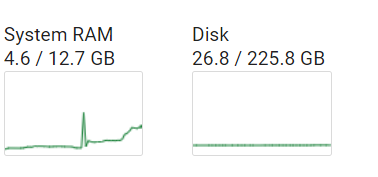

#### 10. Prepare the prompt template to enable Q&A

In [10]:
#query vector store
prompt_template = """Use the following pieces of context to answer the question enclosed within  3 backticks at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.
Please provide an answer which is factually correct and based on the information retrieved from the vector store.
Please also mention any quotes supporting the answer if any present in the context supplied within two double quotes "" .

{context}

QUESTION:```{question}```
ANSWER:
"""
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context","question"]
  )
#
chain_type_kwargs = {"prompt": PROMPT}

#### 11. Query the Vectorstore and Provide answers using the RetrievalQA method of Langchain

In [11]:
qa = RetrievalQA.from_chain_type(llm=ChatOpenAI(model_name='gpt-3.5-turbo-16k',
                                                  openai_api_key=os.environ["OPENAI_API_KEY"],
                                                  temperature=0),
                                  chain_type="stuff",
                                  chain_type_kwargs={"prompt": PROMPT},
                                  retriever=doc_store.as_retriever(search_kwargs={"k": 5}),
                                  return_source_documents=True
                                  )

In [12]:
questions = input("Please provide the symptoms here :")
print(questions)
result = qa(questions)

Please provide the symptoms here :My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?
My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?


In [13]:
result.keys()

dict_keys(['query', 'result', 'source_documents'])

In [14]:
print(result['query'])

My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?


In [15]:
print(result['result'])

The possible cause of your son's symptoms could be cerebral palsy. Cerebral palsy is a group of disorders that affect movement and muscle tone or posture. It is caused by damage that occurs to the immature brain as it develops, most often before birth. Symptoms of cerebral palsy include poor coordination, unsteady walk, and difficulty with fine motor tasks. It is important to consult with a doctor for a proper diagnosis and to rule out other possible causes.


In [17]:
print(result['source_documents'][0].page_content)

Disease: Palsy, cerebral (See: Palsy, cerebral, also known asCerebral palsy)
Symptoms: Signs and symptoms can vary greatly. Movement and coordination problems associated with cerebral palsy include: Cerebral palsy can affect the whole body or it might be limited primarily to one limb or one side of the body. The brain disorder causing cerebral palsy doesnt change with time so the symptoms usually dont worsen with age. However as the child gets older some symptoms might become more or less apparent. And muscle shortening and muscle rigidity can worsen if not treated aggressively. Brain abnormalities associated with cerebral palsy might also contribute to other neurological problems including: Its important to get a prompt diagnosis for a movement disorder or delays in your childs development. See your childs doctor if you have concerns about episodes of loss of awareness of surroundings or of abnormal bodily movements abnormal muscle tone impaired coordination swallowing difficulties ey

## RAGAS

## Evaluate the Q&A RAG pipeline

* In order to evaluate the qa system we generated a few relevant questions

#### To work with ragas all you need are the following data
- question: `list[str]` - These are the questions you RAG pipeline will be evaluated on.
- answer: `list[str]` - The answer generated from the RAG pipeline and give to the user.
- contexts: `list[list[str]]` - The contexts which where passed into the LLM to answer the question.
- ground_truths: `list[list[str]]` - The ground truth answer to the questions.


## Metrics

Ragas provides you with a few metrics to evaluate the different aspects of your RAG systems namely

1. metrics to evaluate retrieval: offers `context_relevancy` and `context_recall` which give you the measure of the performance of your retrieval system.
2. metrics to evaluate generation: offers `faithfulness` which measures hallucinations and `answer_relevancy` which measures how to the point the answers are to the question.

The harmonic mean of these 4 aspects gives you the **ragas score** which is a single measure of the performance of your QA system across all the important aspects.

now lets import these metrics and understand more about what they denote

In [18]:
eval_questions = [
    "I have persistent back pain since 4 weeks,I workouut but havent had any sports injury.What might be the cause of the back pain?",
    "I have shortness of breath and frequently feel nauseated and tired.What can be the possible cause?",
    "My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?",
    "What is Baby acne ?",
    "What is Botulism ?",
]

eval_answers = [
    "From the symptoms mentioned you might have a disloacted disk",  # incorrect answer
    "You might have asthama.",  # incorrect answer
    " Movement and coordination problems associated with cerebral palsy.Please consult a doctor for better diagnosis.",
    "Baby acne is small, inflamed bumps on a baby's face, neck, back or chest.",
    "Botulism is a rare and potentially fatal illness caused by a toxin produced by the bacterium Clostridium botulinum.",
]

examples = [
    {"query": q, "ground_truths": [eval_answers[i]]}
    for i, q in enumerate(eval_questions)
]

In [19]:
examples

[{'query': 'I have persistent back pain since 4 weeks,I workouut but havent had any sports injury.What might be the cause of the back pain?',
  'ground_truths': ['From the symptoms mentioned you might have a disloacted disk']},
 {'query': 'I have shortness of breath and frequently feel nauseated and tired.What can be the possible cause?',
  'ground_truths': ['You might have asthama.']},
 {'query': 'My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?',
  'ground_truths': [' Movement and coordination problems associated with cerebral palsy.Please consult a doctor for better diagnosis.']},
 {'query': 'What is Baby acne ?',
  'ground_truths': ["Baby acne is small, inflamed bumps on a baby's face, neck, back or chest."]},
 {'query': 'What is Botulism ?',
  'ground_truths': ['Botulism is a rare and potentially fatal illness caused by a toxin produced by the bacterium Clostridi

## RagasEvaluatorChain
RagasEvaluatorChain creates a wrapper around the metrics ragas provides (documented here), making it easier to run these evaluation with langchain and langsmith.

The evaluator chain has the following APIs

- __call__(): call the RagasEvaluatorChain directly on the result of a QA chain.
- **evaluate()**: evaluate on a list of examples (with the input queries) and predictions (outputs from the QA chain).
- **evaluate_run()**: method implemented that is called by langsmith evaluators to evaluate langsmith datasets.

#### __call__(): call the RagasEvaluatorChain directly on the result of a QA chain.

In [21]:
result = qa({"query": eval_questions[4]})
result["result"]

'Botulism is a rare but serious condition caused by toxins from bacteria called Clostridium botulinum. It can be classified into three common forms: foodborne botulism, wound botulism, and infant botulism. Foodborne botulism occurs when the bacteria grow and produce toxins in low-acid home-canned foods or other contaminated foods. Wound botulism occurs when the bacteria enter a wound and produce toxins. Infant botulism occurs when infants consume spores of the bacteria, which then grow and produce toxins in their intestinal tracts. Botulism can cause symptoms such as difficulty swallowing or speaking, dry mouth, facial weakness, blurred or double vision, drooping eyelids, trouble breathing, nausea, vomiting, abdominal cramps, and paralysis. Seek urgent medical care if botulism is suspected, as early treatment increases the chances of survival and reduces the risk of complications. Botulism is not contagious from person to person.'

In [26]:
result = qa(examples[4])
result["result"]

'Botulism is a rare but serious condition caused by toxins from bacteria called Clostridium botulinum. It can be classified into three common forms: foodborne botulism, wound botulism, and infant botulism. Foodborne botulism occurs when the bacteria grow and produce toxins in low-acid home-canned foods or other contaminated foods. Wound botulism occurs when the bacteria enter a wound and produce toxins. Infant botulism occurs when infants consume spores of the bacteria, which then grow and produce toxins in their intestinal tracts. Botulism can cause symptoms such as difficulty swallowing or speaking, dry mouth, facial weakness, blurred or double vision, drooping eyelids, trouble breathing, nausea, vomiting, abdominal cramps, and paralysis. Seek urgent medical care if botulism is suspected, as early treatment increases the chances of survival and reduces the risk of complications. Botulism is not contagious from person to person.'

In [22]:
from ragas.langchain.evalchain import RagasEvaluatorChain
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_relevancy,
    context_recall,
)

# create evaluation chains
faithfulness_chain = RagasEvaluatorChain(metric=faithfulness)
answer_rel_chain = RagasEvaluatorChain(metric=answer_relevancy)
context_rel_chain = RagasEvaluatorChain(metric=context_relevancy)
context_recall_chain = RagasEvaluatorChain(metric=context_recall)

#### Faithfulness Score

In [27]:
eval_result = faithfulness_chain(result)
eval_result["faithfulness_score"]

1.0

#### Context Recall Score

In [28]:
eval_result = context_recall_chain(result)
eval_result["context_recall_score"]

0.6

#### Answer relevancy score

In [30]:
eval_result = answer_rel_chain(result)
eval_result['answer_relevancy_score']

0.8688623215992995

#### Context relevancy score

In [32]:
eval_result = context_rel_chain(result)
eval_result['context_ relevancy_score']

0.00709349482598966

## evaluate()
Evaluate a list of inputs/queries and the outputs/predictions from the QA chain.

In [33]:
# run the queries as a batch for efficiency
predictions = qa.batch(examples)

# evaluate
print("evaluating...")
r = faithfulness_chain.evaluate(examples, predictions)
r

evaluating...


100%|██████████| 1/1 [00:56<00:00, 56.71s/it]


[{'faithfulness_score': 1.0},
 {'faithfulness_score': 0.5},
 {'faithfulness_score': 0.33333333333333337},
 {'faithfulness_score': 1.0},
 {'faithfulness_score': 1.0}]

In [34]:
# evaluate context recall
print("evaluating...")
r = context_recall_chain.evaluate(examples, predictions)
r

evaluating...


100%|██████████| 1/1 [00:16<00:00, 16.24s/it]


[{'context_recall_score': 1.0},
 {'context_recall_score': 0.0},
 {'context_recall_score': 0.75},
 {'context_recall_score': 1.0},
 {'context_recall_score': 0.6}]